In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from time import time
import random
random.seed(11)

/Users/Daphne/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df = pd.read_csv('opinions_since_1970.csv')

In [4]:
df[0:10]

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text
0,Justice Roberts,majority,False,McCutcheon v. Federal Election Comm'n,2014-04-02,NaN,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,There is no right more basic in our democracy ...
1,Justice Thomas,concurring,False,McCutcheon v. Federal Election Comm'n,2014-04-02,NaN,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,I adhere to the view that this Court’s decisio...
2,Justice Breyer,dissenting,False,McCutcheon v. Federal Election Comm'n,2014-04-02,NaN,https://www.courtlistener.com/opinion/2659301/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,2013-033,1.0,5.0,4.0,"Nearly 40 years ago in Buckley v. Valeo, 424 U..."
3,Justice Kagan,majority,False,Kaley v. United States,2014-02-25,NaN,https://www.courtlistener.com/opinion/2654533/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,NaN,NaN,NaN,NaN,"A federal statute, 21 U.S. C. §853(e), authori..."
4,Justice Roberts,dissenting,False,Kaley v. United States,2014-02-25,NaN,https://www.courtlistener.com/opinion/2654533/...,https://www.courtlistener.com/api/rest/v3/clus...,2014,NaN,NaN,NaN,NaN,An individual facing serious criminal charges ...
5,Justice Kennedy,majority,False,"Masterpiece Cakeshop, Ltd. v. Colorado Civil R...",2018-06-13,NaN,https://www.courtlistener.com/opinion/4507882/...,https://www.courtlistener.com/api/rest/v3/clus...,2018,NaN,NaN,NaN,NaN,In 2012 a same-sex couple visited Masterpiece\...
6,Justice Kagan,concurring,False,"Masterpiece Cakeshop, Ltd. v. Colorado Civil R...",2018-06-13,NaN,https://www.courtlistener.com/opinion/4507882/...,https://www.courtlistener.com/api/rest/v3/clus...,2018,NaN,NaN,NaN,NaN,“[I]t is a general rule that [religious and ph...
7,Justice Ginsburg,dissenting,False,"Masterpiece Cakeshop, Ltd. v. Colorado Civil R...",2018-06-13,NaN,https://www.courtlistener.com/opinion/4507882/...,https://www.courtlistener.com/api/rest/v3/clus...,2018,NaN,NaN,NaN,NaN,There is much in the Court’s opinion with whic...
8,Justice White,majority,False,Steelworkers v. Rawson,1990-05-14,NaN,https://www.courtlistener.com/opinion/112426/s...,https://www.courtlistener.com/api/rest/v3/clus...,1990,1989-077,2.0,6.0,3.0,We granted certiorari in this case because the...
9,Justice Kennedy,dissenting,False,Steelworkers v. Rawson,1990-05-14,NaN,https://www.courtlistener.com/opinion/112426/s...,https://www.courtlistener.com/api/rest/v3/clus...,1990,1989-077,2.0,6.0,3.0,The Idaho Supreme Court held that summary judg...


In [5]:
df["author_name"]

0          Justice Roberts
1           Justice Thomas
2           Justice Breyer
3            Justice Kagan
4          Justice Roberts
5          Justice Kennedy
6            Justice Kagan
7         Justice Ginsburg
8            Justice White
9          Justice Kennedy
10         Justice Gorsuch
11           Justice Alito
12          Justice Scalia
13          Justice Thomas
14          Justice Scalia
15         Justice Kennedy
16          Justice Breyer
17          Justice Scalia
18           Justice White
19         Justice Douglas
20          Justice Scalia
21        Justice Ginsburg
22          Justice Thomas
23        Justice Blackmun
24           Justice White
25          Justice Burger
26         Justice Brennan
27        Justice Blackmun
28              per_curiam
29        Justice Ginsburg
               ...        
10961       Justice Thomas
10962     Justice O'Connor
10963           per_curiam
10964    Justice Rehnquist
10965      Justice Stevens
10966       Justice Souter
1

In [6]:
df.shape[0]

10991

In [7]:
len(df.columns)

14

In [8]:
num_opinions = df["author_name"].value_counts()

In [9]:
df.loc[df['author_name'] == ""]

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text


In [10]:
df.iloc[[2122]]

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text
2122,Justice Marshall,majority,False,Gillette v. United States,1971-03-08,NaN,https://www.courtlistener.com/opinion/108285/g...,https://www.courtlistener.com/api/rest/v3/clus...,1971,1970-057,1.0,8.0,1.0,These cases present the question whether consc...


In [11]:
num_opinions

Justice Stevens       1181
per_curiam             755
Justice Rehnquist      752
Justice Brennan        732
Justice Scalia         718
Justice White          655
Justice Blackmun       654
Justice Marshall       611
Justice Thomas         551
Justice O'Connor       518
Justice Kennedy        461
Justice Powell         455
Justice Burger         417
Justice Breyer         416
Justice Ginsburg       407
Justice Stewart        328
Justice Souter         291
Justice Douglas        287
Justice Alito          239
Justice Sotomayor      175
Justice Kagan          110
Justice Roberts         94
Justice Black           59
Justice Harlan          50
Justice Gorsuch         47
Justice Kavanaugh       20
Justice O2122            2
Justice Fuller           1
Justice Woods            1
Justice McReynolds       1
Justice Holmes           1
Justice Waite            1
Justice Connor           1
Name: author_name, dtype: int64

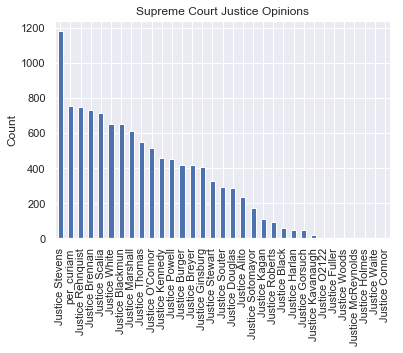

In [12]:
plt.figure()
ax = num_opinions.plot(kind='bar')
ax.set_title("Supreme Court Justice Opinions")
ax.set_ylabel("Count")
plt.show()

In [13]:
category_counts = pd.crosstab(df["category"], df["author_name"])
category_counts

author_name,Justice Alito,Justice Black,Justice Blackmun,Justice Brennan,Justice Breyer,Justice Burger,Justice Connor,Justice Douglas,Justice Fuller,Justice Ginsburg,...,Justice Scalia,Justice Sotomayor,Justice Souter,Justice Stevens,Justice Stewart,Justice Thomas,Justice Waite,Justice White,Justice Woods,per_curiam
category,,,,,,,,,,,,,,,,,,,,,
concurring,40,8,146,124,56,91,0,33,0,62,...,206,36,53,222,51,126,0,97,0,0
dissenting,53,25,152,293,99,82,1,180,0,91,...,186,42,56,465,79,135,0,161,0,0
majority,111,21,305,282,214,242,0,69,1,228,...,279,87,153,379,178,230,1,370,1,0
per_curiam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,755
second_dissenting,35,5,51,33,47,2,0,5,0,26,...,47,10,29,115,20,60,0,27,0,0


In [14]:
type_opinions = df["category"].value_counts()

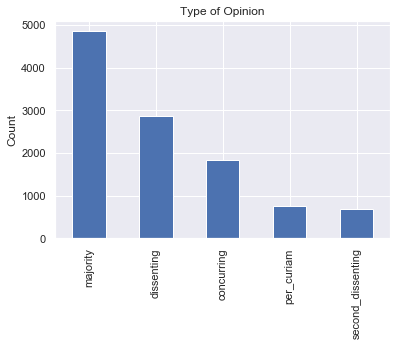

In [15]:
plt.figure()
ax = type_opinions.plot(kind='bar')
ax.set_title("Type of Opinion")
ax.set_ylabel("Count")
plt.show()

In [16]:
year_filed = df["year_filed"].value_counts()

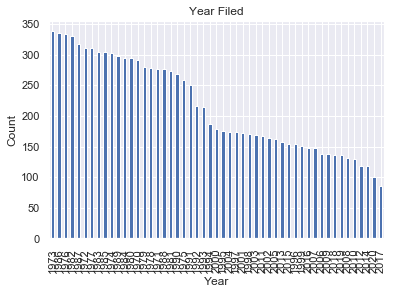

In [70]:
plt.figure()
ax = year_filed.plot(kind="bar")
ax.set_title("Opinions filed per year")
ax.set_ylabel("Count")
ax.set_xlabel("Year")
plt.show()

In [55]:
df = df[df.category != 'per_curiam']

In [19]:
df.category = df.category.map(lambda x: x if x != 'second_dissenting' else 'dissenting')

In [20]:
type_opinions = df["category"].value_counts()

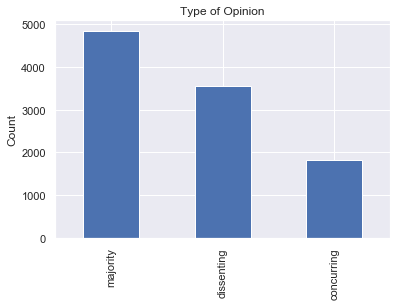

In [21]:
plt.figure()
ax = type_opinions.plot(kind='bar')
ax.set_title("Type of Opinion")
ax.set_ylabel("Count")
plt.show()

In [22]:
# drop least common authors (Roberts, Kagan, Black, Harlan)
authors_with_min_20 = df.author_name.value_counts()[df.author_name.value_counts() >= 20].index
df = df[df.author_name.isin(authors_with_min_20)]

In [23]:
num_opinions = df["author_name"].value_counts()

In [24]:
num_opinions

Justice Stevens      1181
Justice Rehnquist     752
Justice Brennan       732
Justice Scalia        718
Justice White         655
Justice Blackmun      654
Justice Marshall      611
Justice Thomas        551
Justice O'Connor      518
Justice Kennedy       461
Justice Powell        455
Justice Burger        417
Justice Breyer        416
Justice Ginsburg      407
Justice Stewart       328
Justice Souter        291
Justice Douglas       287
Justice Alito         239
Justice Sotomayor     175
Justice Kagan         110
Justice Roberts        94
Justice Black          59
Justice Harlan         50
Justice Gorsuch        47
Justice Kavanaugh      20
Name: author_name, dtype: int64

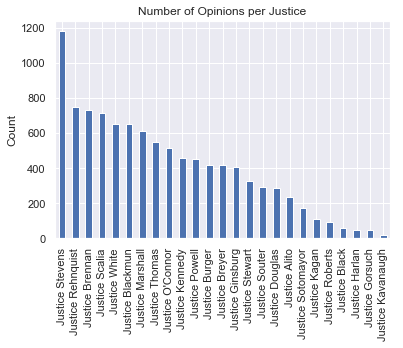

In [25]:
plt.figure()
ax = num_opinions.plot(kind='bar')
ax.set_title("Number of Opinions per Justice")
ax.set_ylabel("Count")
plt.show()

In [26]:
df.category = df.category.map(lambda x: x if x != 'second_dissenting' else 'dissenting')

In [27]:
type_opinions = df['category'].value_counts()

In [28]:
type_opinions

majority      4848
dissenting    3554
concurring    1826
Name: category, dtype: int64

In [29]:
df.shape[0]

10228

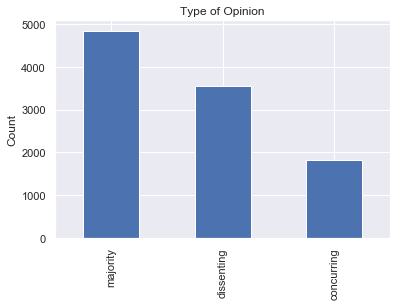

In [30]:
plt.figure()
ax = type_opinions.plot(kind='bar')
ax.set_title("Type of Opinion")
ax.set_ylabel("Count")
plt.show()

In [31]:
df.groupby('author_name').agg('mean').year_filed.astype(int).sort_values()

author_name
Justice Black        1970
Justice Harlan       1970
Justice Douglas      1972
Justice Stewart      1975
Justice Burger       1978
Justice Powell       1979
Justice Brennan      1980
Justice White        1981
Justice Marshall     1981
Justice Blackmun     1982
Justice Rehnquist    1985
Justice Stevens      1990
Justice O'Connor     1991
Justice Souter       1999
Justice Scalia       2000
Justice Kennedy      2001
Justice Ginsburg     2006
Justice Breyer       2007
Justice Thomas       2007
Justice Roberts      2011
Justice Alito        2013
Justice Kagan        2015
Justice Sotomayor    2015
Justice Gorsuch      2018
Justice Kavanaugh    2019
Name: year_filed, dtype: int64

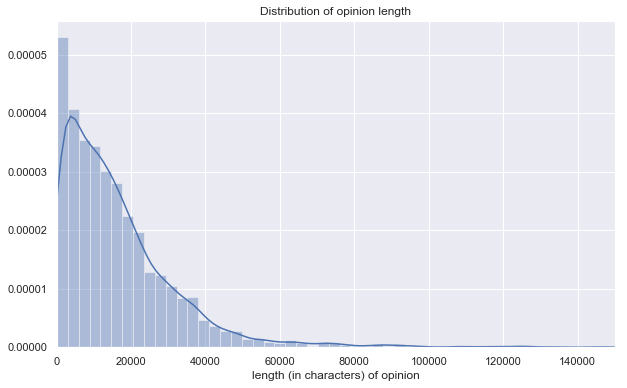

In [67]:
plt.figure(figsize=(10,6))
sns.distplot(df[df.category==category].text.map(lambda x: len(x)))
plt.title('Distribution of opinion length')
plt.xlim((0,150000))
plt.xlabel('length (in characters) of opinion')
plt.show()

<Figure size 432x288 with 0 Axes>

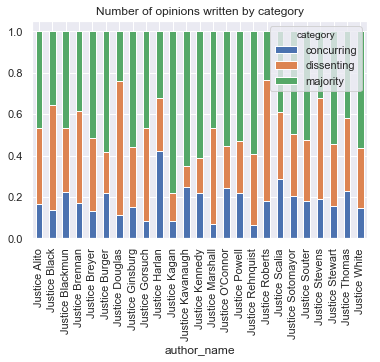

In [33]:
plt.figure()
pd.crosstab(df["category"],df["author_name"],normalize="columns").transpose().plot.bar(stacked=True)
plt.title('Number of opinions written by category')
plt.show()

<Figure size 432x288 with 0 Axes>

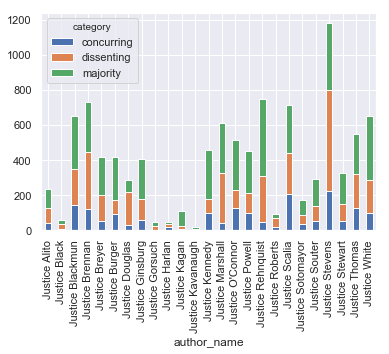

In [34]:
plt.figure()
pd.crosstab(df["category"],df["author_name"]).transpose().plot.bar(stacked=True)
plt.show()

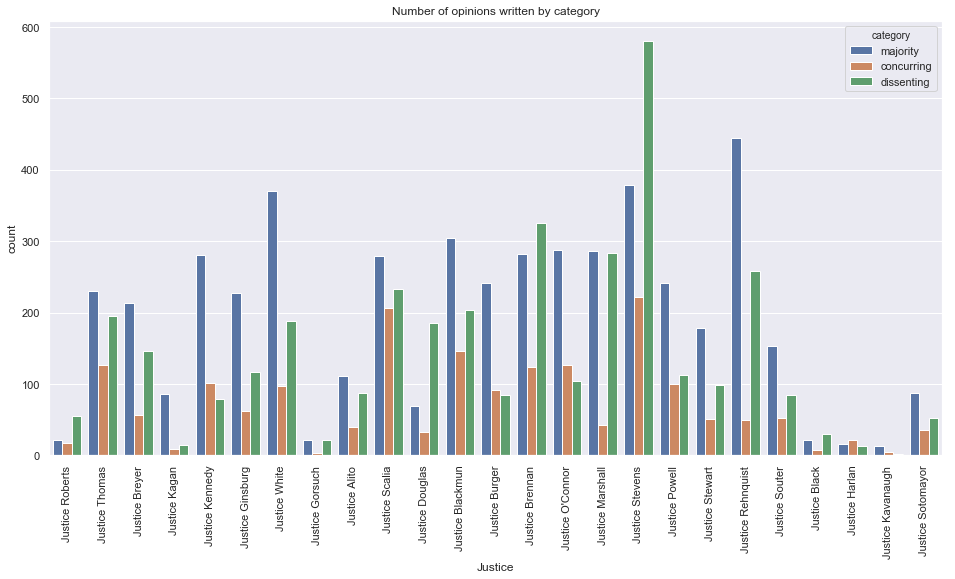

In [35]:
plt.figure(figsize=(16,8))
sns.countplot('author_name', hue='category', data=df)
plt.xticks(rotation=90)
plt.xlabel('Justice')
plt.title('Number of opinions written by category')
plt.show()

In [39]:
temporal_sequence = df.groupby('author_name').agg('mean').year_filed.sort_values().index

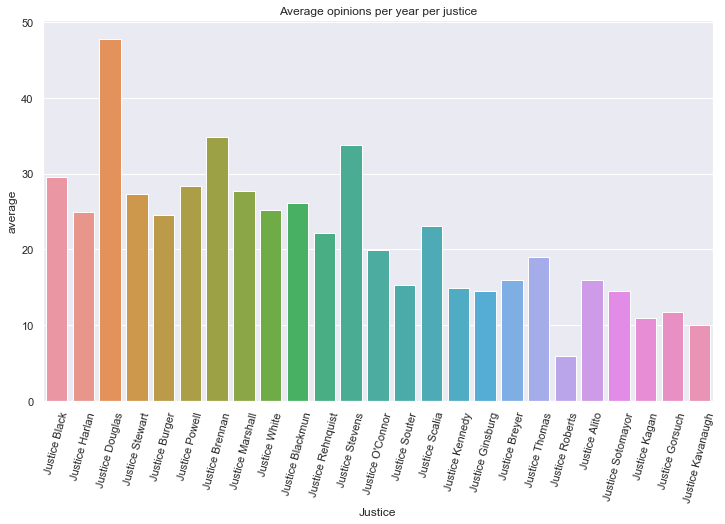

In [40]:
yearly_counts = df.groupby('author_name').agg(
    {'year_filed': pd.Series.nunique,
     'category': 'count' })
yearly_counts['average'] = yearly_counts.category / yearly_counts.year_filed
plt.figure(figsize=(12,7))
sns.barplot('author_name','average', order=temporal_sequence, data=yearly_counts.reset_index())
plt.xticks(rotation=75)
plt.xlabel('Justice')
plt.title('Average opinions per year per justice')
plt.show()

In [37]:
df['word_count'] = df.text.map(lambda x: len(x.split()))
df.groupby('author_name').agg('mean').word_count.astype(int).sort_values()

author_name
Justice Douglas      1713
Justice Black        2133
Justice Stewart      2380
Justice Stevens      2455
Justice Harlan       2574
Justice Burger       2599
Justice Powell       2686
Justice Marshall     2772
Justice Rehnquist    2893
Justice Brennan      2928
Justice Blackmun     3054
Justice White        3075
Justice Scalia       3283
Justice Thomas       3391
Justice Kavanaugh    3665
Justice O'Connor     3687
Justice Ginsburg     3780
Justice Souter       4002
Justice Breyer       4068
Justice Roberts      4245
Justice Kennedy      4671
Justice Sotomayor    4782
Justice Gorsuch      5118
Justice Alito        5260
Justice Kagan        5699
Name: word_count, dtype: int64

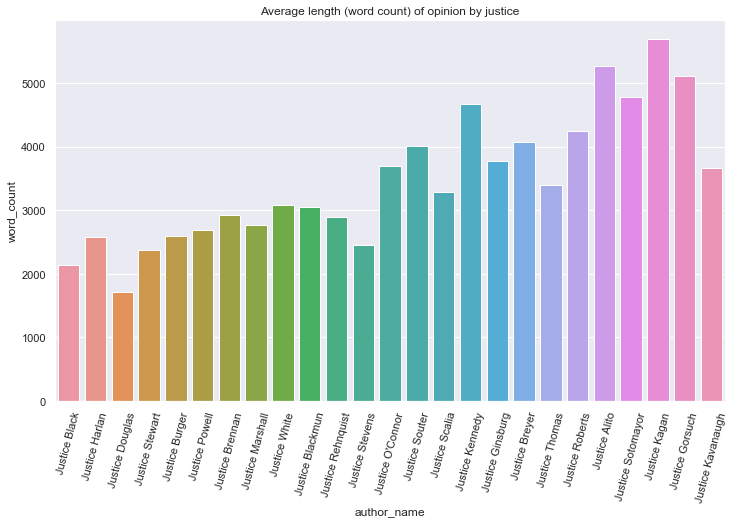

In [41]:
plt.figure(figsize=(12,7))
sns.barplot('author_name', 'word_count', order=temporal_sequence, data=df, ci = None)
plt.xticks(rotation=75)
plt.title('Average length (word count) of opinion by justice')
plt.show()

,author_name,category,per_curiam,case_name,date_filed,federal_cite_one,absolute_url,cluster,year_filed,scdb_id,scdb_decision_direction,scdb_votes_majority,scdb_votes_minority,text,word_count


In [1]:
yearly_counts = df.groupby('year_filed').agg({'federal_cite_one': pd.Series.nunique})
plt.figure(figsize=(10,6))
plt.plot(yearly_counts) # index omits 2017(36) and 2018(1) which have not-yet-catalogued cases
plt.title('Number of cases per year with at least one attributed opinion (i.e., not decided per curiam)', fontsize=14)
plt.ylim((0,180))
plt.xlabel('Year')
plt.ylabel('Number of cases')
plt.show()

NameError: name 'df' is not defined

ValueError: x and y must have same first dimension, but have shapes (10228,) and (1, 25)

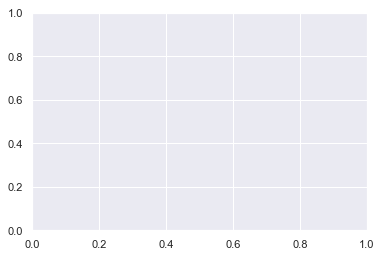

In [46]:
plt.plot(df["year_filed"], [num_opinions])